## Statistics of cognitive test scores

This includes ACS test, structure language tasks, and composite cognitive scores (language, executive function, memory, speed).

In [1]:
import os, json, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import librosa



from data_analysis.dataloader.dataloader import DataLoader
from util.helpers import prepare_demographics

from config.config import Config
from config.constants import Constants

/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/google/api_core/_python_version_support.py:246: FutureWarning: You are using a non-supported Python version (3.9.23). Google will not post any further updates to google.api_core supporting this Python version. Please upgrade to the latest Python version, or at least Python 3.10, and then update google.api_core.
  warnings.warn(message, FutureWarning)
/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/google/auth/__init__.py:54: FutureWarning: You are using a Python version 3.9 past its end of life. Google will update google-auth with critical bug fixes on a best-effort basis, but not with any other fixes or features. Please upgrade your Python version,

In [2]:

def load_data(task):
    transcript_version = 'google'
    config = Config.from_dict({'config_linguistic_features': {'feature_groups': ['literature_features']},#, 'LIWC_features']}, 
                               'config_data': {'transcript_version': transcript_version, 'task': task, 'split': 'full'},
                               'config_model': {'cv_splits': 1}})
    dataloader = DataLoader(config=config)
    dataset = dataloader.load_data()

    return dataset

dataset = load_data('pictureDescription')

No consent_filter specified (consent for further data use), loading all participants
Initializing dataloader LUHA dataloader (transcript_version google, task pictureDescription) Split full
Loading data using dataloader LUHA dataloader
Using theory factor scores version 2025-01-07-1929
Standardizing theory factor scores to zero mean and unit variance. This makes comparison of certain evaluation metrics, beta coefficients etc. more interpretable.
Combining cookieTheft and picnicScene to get pictureDescription... ... done.
Loading train/test set from /Users/jheitz/git/speech_cognitive_biomarker/src/resources/train_test_split_2025-01-08_17-03.csv


In [3]:
dataset.factor_scores_theory

,composite_memory,composite_language,composite_speed,composite_executive_function
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
998,-1.978423,-1.129010,-1.678355,-0.762865
999,-0.784269,0.236125,0.116117,0.461949
1000,0.675272,-0.579871,-0.393217,-0.075053
1001,-1.058312,-2.112216,-3.299513,-2.185922


In [4]:
dataset.acs_outcomes_imputed

,connect_the_dots_I_time_msec,connect_the_dots_II_time_msec,wordlist_correct_words,avg_reaction_speed,place_the_beads_total_extra_moves,box_tapping_total_correct,fill_the_grid_total_time,wordlist_delayed_correct_words,wordlist_recognition_correct_words,digit_sequence_1_correct_series,digit_sequence_2_correct_series,dragskill_time,clickskill_time,typeskill_time
0,28335.0,38561.000000,57.0,307.5,0.0,9.000000,52796.0,11.0,30.000000,15.0,10.0,28487.00000,19192.0,21744.0
1,36718.0,45951.000000,70.0,278.9,19.0,10.000000,51485.0,15.0,30.000000,16.0,14.0,32866.00000,24394.0,10171.0
2,41084.0,57175.000000,53.0,297.3,11.0,10.000000,68952.0,9.0,30.000000,12.0,7.0,31024.00000,28212.0,32137.0
3,55885.0,83892.372057,21.0,396.7,5.0,6.000000,85997.0,2.0,26.914678,10.0,2.0,35946.00000,50729.0,31561.0
4,52806.0,68349.000000,65.0,300.3,32.0,11.000000,78118.0,14.0,30.000000,15.0,11.0,36415.00000,32190.0,23290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,41754.0,71755.000000,35.0,315.6,18.0,8.000000,83871.0,6.0,23.000000,12.0,7.0,58640.00000,30829.0,40086.0
999,40204.0,48961.000000,42.0,473.3,31.0,10.000000,61732.0,9.0,26.000000,11.0,8.0,33470.65338,20591.0,16832.0
1000,38289.0,59229.000000,54.0,405.1,12.0,9.000000,72487.0,13.0,30.000000,10.0,7.0,38804.00000,24300.0,13767.0
1001,67702.0,88061.000000,34.0,356.0,25.0,8.190672,115420.0,9.0,28.000000,8.0,9.0,52694.00000,32517.0,33271.0


In [5]:
processed_data_dir = os.path.join(Constants().DATA_PROCESSED_COMBINED, "data")

acs_outcomes_outliers_removed = pd.read_csv(os.path.join(processed_data_dir, "acs_outcomes_outliers_removed.csv")).drop(columns=['study_submission_id'])
acs_outcomes_outliers_removed = acs_outcomes_outliers_removed[Constants().ACS_MAIN_OUTCOME_VARIABLES + ['clickskill_time', 'dragskill_time']]
acs_outcomes_outliers_removed

,connect_the_dots_I_time_msec,connect_the_dots_II_time_msec,wordlist_correct_words,avg_reaction_speed,place_the_beads_total_extra_moves,box_tapping_total_correct,fill_the_grid_total_time,wordlist_delayed_correct_words,wordlist_recognition_correct_words,digit_sequence_1_correct_series,digit_sequence_2_correct_series,clickskill_time,dragskill_time
0,28335.0,38561.0,57.0,307.5,0.0,9.0,52796.0,11.0,30.0,15.0,10.0,19192.0,28487.0
1,36718.0,45951.0,70.0,278.9,19.0,10.0,51485.0,15.0,30.0,16.0,14.0,24394.0,32866.0
2,41084.0,57175.0,53.0,297.3,11.0,10.0,68952.0,9.0,30.0,12.0,7.0,28212.0,31024.0
3,55885.0,NaN,21.0,396.7,5.0,6.0,85997.0,2.0,NaN,10.0,2.0,50729.0,35946.0
4,52806.0,68349.0,65.0,300.3,32.0,11.0,78118.0,14.0,30.0,15.0,11.0,32190.0,36415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,41754.0,71755.0,35.0,315.6,18.0,8.0,83871.0,6.0,23.0,12.0,7.0,30829.0,58640.0
999,40204.0,48961.0,42.0,473.3,31.0,10.0,61732.0,9.0,26.0,11.0,8.0,20591.0,NaN
1000,38289.0,59229.0,54.0,405.1,12.0,9.0,72487.0,13.0,30.0,10.0,7.0,24300.0,38804.0
1001,67702.0,88061.0,34.0,356.0,25.0,NaN,115420.0,9.0,28.0,8.0,9.0,32517.0,52694.0


In [6]:
language_task_scores = dataset.language_task_scores
language_task_scores

,phonemic_fluency_score,semantic_fluency_score,picture_naming_score
0,13.0,25.0,NaN
1,NaN,34.0,NaN
2,23.0,35.0,NaN
3,14.0,17.0,NaN
4,16.0,25.0,NaN
...,...,...,...
998,11.0,16.0,18.0
999,19.0,20.0,20.0
1000,8.0,17.0,19.0
1001,13.0,12.0,12.0


In [7]:
all_test_scores = pd.concat((
    acs_outcomes_outliers_removed,
    language_task_scores,
), axis=1)
all_test_scores

,connect_the_dots_I_time_msec,connect_the_dots_II_time_msec,wordlist_correct_words,avg_reaction_speed,place_the_beads_total_extra_moves,box_tapping_total_correct,fill_the_grid_total_time,wordlist_delayed_correct_words,wordlist_recognition_correct_words,digit_sequence_1_correct_series,digit_sequence_2_correct_series,clickskill_time,dragskill_time,phonemic_fluency_score,semantic_fluency_score,picture_naming_score
0,28335.0,38561.0,57.0,307.5,0.0,9.0,52796.0,11.0,30.0,15.0,10.0,19192.0,28487.0,13.0,25.0,NaN
1,36718.0,45951.0,70.0,278.9,19.0,10.0,51485.0,15.0,30.0,16.0,14.0,24394.0,32866.0,NaN,34.0,NaN
2,41084.0,57175.0,53.0,297.3,11.0,10.0,68952.0,9.0,30.0,12.0,7.0,28212.0,31024.0,23.0,35.0,NaN
3,55885.0,NaN,21.0,396.7,5.0,6.0,85997.0,2.0,NaN,10.0,2.0,50729.0,35946.0,14.0,17.0,NaN
4,52806.0,68349.0,65.0,300.3,32.0,11.0,78118.0,14.0,30.0,15.0,11.0,32190.0,36415.0,16.0,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,41754.0,71755.0,35.0,315.6,18.0,8.0,83871.0,6.0,23.0,12.0,7.0,30829.0,58640.0,11.0,16.0,18.0
999,40204.0,48961.0,42.0,473.3,31.0,10.0,61732.0,9.0,26.0,11.0,8.0,20591.0,NaN,19.0,20.0,20.0
1000,38289.0,59229.0,54.0,405.1,12.0,9.0,72487.0,13.0,30.0,10.0,7.0,24300.0,38804.0,8.0,17.0,19.0
1001,67702.0,88061.0,34.0,356.0,25.0,NaN,115420.0,9.0,28.0,8.0,9.0,32517.0,52694.0,13.0,12.0,12.0


In [8]:

test_renaming = {
    'connect_the_dots_I_time_msec': 'Trail Making Test A',
    'connect_the_dots_II_time_msec': 'Trail Making Test B',
    'wordlist_correct_words': 'RAVLT (Learning)',
    'avg_reaction_speed': 'Visual Reaction Time',
    'place_the_beads_total_extra_moves': '(DELETE) Place the Beads',
    'box_tapping_total_correct': 'Corsi Block-tapping Test',
    'fill_the_grid_total_time': 'Grooved Pegboard',
    'wordlist_delayed_correct_words': 'RAVLT (Recall)',
    'wordlist_recognition_correct_words': 'RAVLT (Recognition)',
    'digit_sequence_1_correct_series': 'Digit Span (forward)',
    'digit_sequence_2_correct_series': 'Digit Span (backward)',
    'clickskill_time': 'Clicking speed test',
    'dragskill_time': 'Mouse dragging speed test',
    'phonemic_fluency_score': 'Phonemic Fluency ("F" fluency) ',
    'semantic_fluency_score': 'Semantic Fluency (Category fluency)',
    'picture_naming_score': 'Boston Naming Test',
}


outcome_measure = {
    'connect_the_dots_I_time_msec': 'Completion time [sec]',
    'connect_the_dots_II_time_msec': 'Completion time [sec]',
    'wordlist_correct_words': 'Total number of correct words',
    'avg_reaction_speed': 'Mean reaction time [msec]',
    'place_the_beads_total_extra_moves': 'Total number of extra moves',
    'box_tapping_total_correct': 'Total number of correctly repeated sequences',
    'fill_the_grid_total_time': 'Completion time [sec]',
    'wordlist_delayed_correct_words': 'Total number of correct words',
    'wordlist_recognition_correct_words': 'Total number of correct words',
    'digit_sequence_1_correct_series': 'Total number of correctly repeated sequences',
    'digit_sequence_2_correct_series': 'Total number of correctly repeated sequences',
    'clickskill_time': 'Completion time [sec]',
    'dragskill_time': 'Completion time [sec]',
    'phonemic_fluency_score': 'Total number of valid words',
    'semantic_fluency_score': 'Total number of valid words',
    'picture_naming_score': 'Total number of correctly named objects',
}

value_transform_1000 = [
   'connect_the_dots_I_time_msec',  'connect_the_dots_II_time_msec', 'fill_the_grid_total_time', 'clickskill_time', 'dragskill_time'
]
value_transform = {test: 1/1000 if test in value_transform_1000 else 1 for test in all_test_scores.columns}


stats = pd.DataFrame({
    'Mean': all_test_scores.mean(axis=0), 
    'Std': all_test_scores.std(axis=0),
    'Min': all_test_scores.min(axis=0),
    'Max': all_test_scores.max(axis=0),
})
#stats['text'] = stats.apply(lambda row: f"{row['mean']:.2f} +- {row['std']:.2f}", axis=1)

stats['Test'] = [test_renaming[test] for test in stats.index]
stats['value_transform'] = [value_transform[test] for test in stats.index]
for value_col in ['Mean', 'Std', 'Min', 'Max']:
    stats[value_col] = stats[value_col] * stats['value_transform']
    stats[value_col] = stats[value_col].apply(lambda val: f"{val:.1f}")

stats['Outcome measure'] = [outcome_measure[test] for test in stats.index]
stats['Distribution'] = [f"\\adjustbox{{valign=c, padding=0pt 0pt 0pt 0pt}}{{\includegraphics[width=4cm]{{figures/cognitive_scores/test_scores_{test}.pdf}}}}" for test in stats.index]

#stats = stats.sort_values(by="Test")

display(stats)


stats = stats[['Test', 'Outcome measure', 'Mean', 'Std', 'Min', 'Max', 'Distribution']]


stats

,Mean,Std,Min,Max,Test,value_transform,Outcome measure,Distribution
connect_the_dots_I_time_msec,36.8,8.6,18.9,73.6,Trail Making Test A,0.001,Completion time [sec],"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
connect_the_dots_II_time_msec,62.7,18.9,29.2,142.9,Trail Making Test B,0.001,Completion time [sec],"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
wordlist_correct_words,50.3,11.4,13.0,75.0,RAVLT (Learning),1.000,Total number of correct words,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
avg_reaction_speed,323.1,60.1,157.0,554.8,Visual Reaction Time,1.000,Mean reaction time [msec],"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
place_the_beads_total_extra_moves,28.5,15.6,0.0,93.0,(DELETE) Place the Beads,1.000,Total number of extra moves,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
box_tapping_total_correct,9.2,1.6,3.0,15.0,Corsi Block-tapping Test,1.000,Total number of correctly repeated sequences,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
fill_the_grid_total_time,67.1,14.3,40.9,122.3,Grooved Pegboard,0.001,Completion time [sec],"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
wordlist_delayed_correct_words,10.2,3.4,0.0,15.0,RAVLT (Recall),1.000,Total number of correct words,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
wordlist_recognition_correct_words,28.9,1.5,23.0,30.0,RAVLT (Recognition),1.000,Total number of correct words,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
digit_sequence_1_correct_series,12.0,2.4,4.0,16.0,Digit Span (forward),1.000,Total number of correctly repeated sequences,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."


,Test,Outcome measure,Mean,Std,Min,Max,Distribution
connect_the_dots_I_time_msec,Trail Making Test A,Completion time [sec],36.8,8.6,18.9,73.6,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
connect_the_dots_II_time_msec,Trail Making Test B,Completion time [sec],62.7,18.9,29.2,142.9,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
wordlist_correct_words,RAVLT (Learning),Total number of correct words,50.3,11.4,13.0,75.0,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
avg_reaction_speed,Visual Reaction Time,Mean reaction time [msec],323.1,60.1,157.0,554.8,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
place_the_beads_total_extra_moves,(DELETE) Place the Beads,Total number of extra moves,28.5,15.6,0.0,93.0,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
box_tapping_total_correct,Corsi Block-tapping Test,Total number of correctly repeated sequences,9.2,1.6,3.0,15.0,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
fill_the_grid_total_time,Grooved Pegboard,Completion time [sec],67.1,14.3,40.9,122.3,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
wordlist_delayed_correct_words,RAVLT (Recall),Total number of correct words,10.2,3.4,0.0,15.0,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
wordlist_recognition_correct_words,RAVLT (Recognition),Total number of correct words,28.9,1.5,23.0,30.0,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."
digit_sequence_1_correct_series,Digit Span (forward),Total number of correctly repeated sequences,12.0,2.4,4.0,16.0,"\adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{..."


In [10]:
print(stats.to_latex(index=False))

\begin{tabular}{lllllll}
\toprule
Test & Outcome measure & Mean & Std & Min & Max & Distribution \\
\midrule
Trail Making Test A & Completion time [sec] & 36.8 & 8.6 & 18.9 & 73.6 & \adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{\includegraphics[width=4cm]{figures/cognitive_scores/test_scores_connect_the_dots_I_time_msec.pdf}} \\
Trail Making Test B & Completion time [sec] & 62.7 & 18.9 & 29.2 & 142.9 & \adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{\includegraphics[width=4cm]{figures/cognitive_scores/test_scores_connect_the_dots_II_time_msec.pdf}} \\
RAVLT (Learning) & Total number of correct words & 50.3 & 11.4 & 13.0 & 75.0 & \adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{\includegraphics[width=4cm]{figures/cognitive_scores/test_scores_wordlist_correct_words.pdf}} \\
Visual Reaction Time & Mean reaction time [msec] & 323.1 & 60.1 & 157.0 & 554.8 & \adjustbox{valign=c, padding=0pt 0pt 0pt 0pt}{\includegraphics[width=4cm]{figures/cognitive_scores/test_scores_avg_reaction_speed.pdf}} \\
(

/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-package

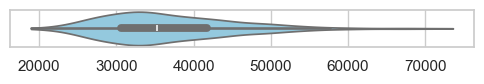

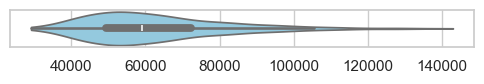

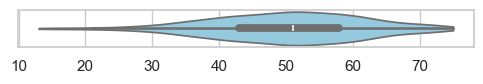

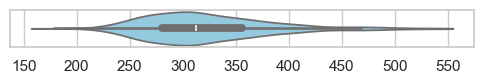

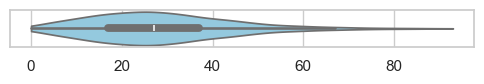

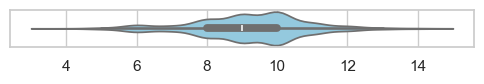

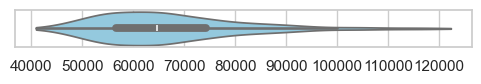

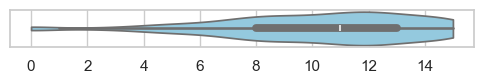

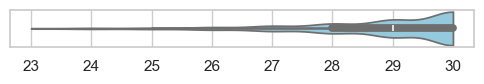

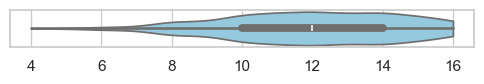

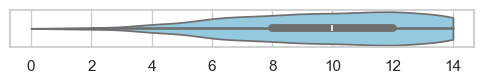

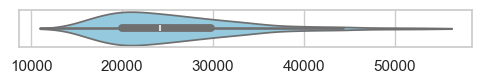

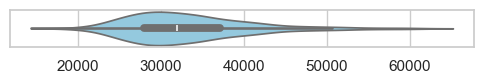

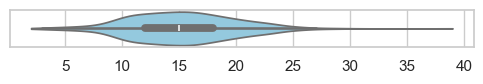

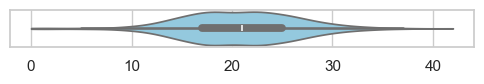

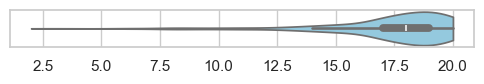

In [11]:
import seaborn as sns

#fig, axes = plt.subplots(nrows=len(all_test_scores.columns), ncols=1, figsize=(5, len(all_test_scores.columns)*1))#
#
#sns.set_theme(style="whitegrid")
#for ax, col in zip(axes, all_test_scores.columns):
#    data = all_test_scores[col]
#    sns.violinplot(data=data, ax=ax, orient="h", cut=0, color="skyblue")
#    ax.set_xlabel("")
    
    
    
#plt.tight_layout()
#plt.savefig("plots/cognitive_scores_stats.png")    



for col in all_test_scores.columns:
    fig = plt.figure(figsize=(5, 1))
    sns.set_theme(style="whitegrid")
    data = all_test_scores[col]
    sns.violinplot(data=data, orient="h", cut=0, color="skyblue")
    plt.violinplot(data)
    plt.xlabel("")
    #plt.xlim([-3, 3])
    
    plt.tight_layout()
    plt.savefig(f"plots/test_scores_{col}.pdf") 
    

In [12]:
def fmt(val):
    print(val)
    return f"{val:.2f}"

stats_composite_scores = pd.DataFrame({
    'mean': dataset.factor_scores_theory.mean(axis=0).apply(fmt), 
    'median': dataset.factor_scores_theory.median(axis=0).apply(fmt), 
    'std': dataset.factor_scores_theory.std(axis=0).apply(fmt),
    'min': dataset.factor_scores_theory.min(axis=0).apply(fmt),
    'max': dataset.factor_scores_theory.max(axis=0).apply(fmt),
})
#stats_composite_scores['text'] = stats_composite_scores.apply(lambda row: f"{row['mean']:.2f} +- {row['std']:.2f}", axis=1)
stats_composite_scores.index = [idx.replace("composite_", "") for idx in stats_composite_scores.index]

stats_composite_scores['Distribution'] = [f"\\adjustbox{{valign=c}}{{\includegraphics[width=3cm]{{figures/cognitive_scores/composite_scores_{idx}.pdf}}}}" for idx in stats_composite_scores.index]
stats_composite_scores

9.878627519414941e-18
1.4368912755512643e-17
1.7961140944390803e-17
1.6165026849951723e-17
0.1275776782974443
0.015893438417316993
0.13294178225148456
0.14781541608326668
1.000505944884381
1.000505944884381
1.000505944884381
1.000505944884381
-3.1665163895676747
-3.259487119989752
-4.559607225352102
-3.5359114699063983
1.8460848002998556
3.6896548943362597
2.342263696536211
2.1372454397773


,mean,median,std,min,max,Distribution
memory,0.00,0.13,1.00,-3.17,1.85,\adjustbox{valign=c}{\includegraphics[width=3c...
language,0.00,0.02,1.00,-3.26,3.69,\adjustbox{valign=c}{\includegraphics[width=3c...
speed,0.00,0.13,1.00,-4.56,2.34,\adjustbox{valign=c}{\includegraphics[width=3c...
executive_function,0.00,0.15,1.00,-3.54,2.14,\adjustbox{valign=c}{\includegraphics[width=3c...


In [13]:
print(stats_composite_scores.to_latex(float_format='.2f'))

\begin{tabular}{lllllll}
\toprule
 & mean & median & std & min & max & Distribution \\
\midrule
memory & 0.00 & 0.13 & 1.00 & -3.17 & 1.85 & \adjustbox{valign=c}{\includegraphics[width=3cm]{figures/cognitive_scores/composite_scores_memory.pdf}} \\
language & 0.00 & 0.02 & 1.00 & -3.26 & 3.69 & \adjustbox{valign=c}{\includegraphics[width=3cm]{figures/cognitive_scores/composite_scores_language.pdf}} \\
speed & 0.00 & 0.13 & 1.00 & -4.56 & 2.34 & \adjustbox{valign=c}{\includegraphics[width=3cm]{figures/cognitive_scores/composite_scores_speed.pdf}} \\
executive_function & 0.00 & 0.15 & 1.00 & -3.54 & 2.14 & \adjustbox{valign=c}{\includegraphics[width=3cm]{figures/cognitive_scores/composite_scores_executive_function.pdf}} \\
\bottomrule
\end{tabular}



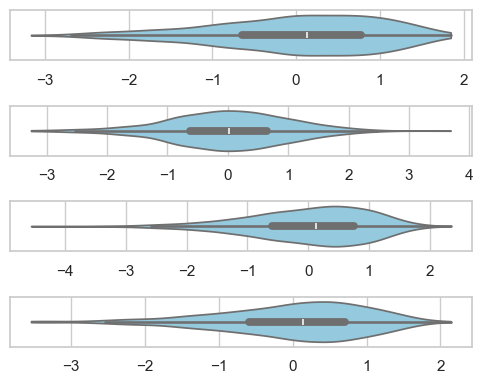

In [14]:
import seaborn as sns

fig, axes = plt.subplots(nrows=len(dataset.factor_scores_theory.columns), ncols=1, figsize=(5, len(dataset.factor_scores_theory.columns)*1))

sns.set_theme(style="whitegrid")
for ax, col in zip(axes, dataset.factor_scores_theory.columns):
    data = dataset.factor_scores_theory[col]
    sns.violinplot(data=data, ax=ax, orient="h", cut=0, color="skyblue")
    ax.set_xlabel("")
    
plt.tight_layout()
plt.savefig("plots/composite_scores_stats.pdf")    
    

/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


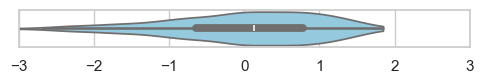

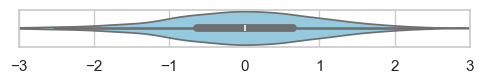

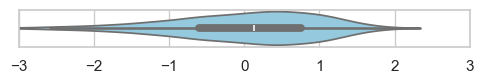

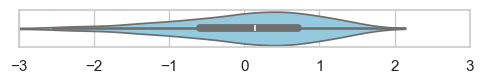

In [15]:
import seaborn as sns


for ax, col in zip(axes, dataset.factor_scores_theory.columns):
    fig = plt.figure(figsize=(5, 1))
    sns.set_theme(style="whitegrid")
    data = dataset.factor_scores_theory[col]
    sns.violinplot(data=data, orient="h", cut=0, color="skyblue")
    plt.violinplot(data)
    plt.xlabel("")
    plt.xlim([-3, 3])
    
    plt.tight_layout()
    plt.savefig(f"plots/composite_scores_{col.replace('composite_','')}.pdf")    

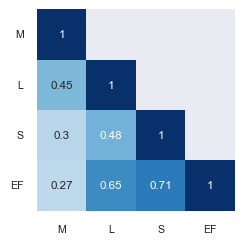

In [23]:
def map_label(c):
    return {
        'composite_memory': 'M',
        'composite_language': 'L',
        'composite_speed': 'S',
        'composite_executive_function': 'EF',
    }.get(c, c)

plt.figure(figsize=(2.5,2.5))
corr = dataset.factor_scores_theory.corr()
for i, j in [(i, j) for i in range(corr.shape[0]) for j in range(corr.shape[1]) if i < j]:
    corr.iloc[i,j]= np.nan
corr = corr.dropna(how="all", axis=0)
corr = corr.dropna(how="all", axis=1)
corr.index = [map_label(c) for c in corr.index]
corr.columns = [map_label(c) for c in corr.columns]
sns.set(font_scale=0.7)
sns.heatmap(corr, cmap="Blues", vmin=0, vmax=1, annot=True, cbar=False, cbar_kws={"shrink": 0.5}, ) #  annot_kws={"fontsize":8},
#plt.title("Correlations between composite scores")
plt.grid(False)
plt.yticks(rotation=0) 

plt.tight_layout()
plt.savefig("plots/composite_scores_correlation.pdf")
plt.show()